# Exploratory Data Analysis

In [ ]:
load(file = file.choose())
Sys.setenv(JAVA_HOME = "C:/Program Files/Java/jre-9.0.4")


In [ ]:
# importing library for visualization
library(ggplot2)

In [ ]:
# importing the datsets and storing it in he form of data frame
df <- read.csv(file = file.choose(), header = T)

In [ ]:
dftrain <- df

In [ ]:
dftest <- df

## Structure of the datasets 

In [ ]:
str(dftest)
str(dftrain)

## Bar plot for Gender

Var1,Freq
Female,86
Male,394


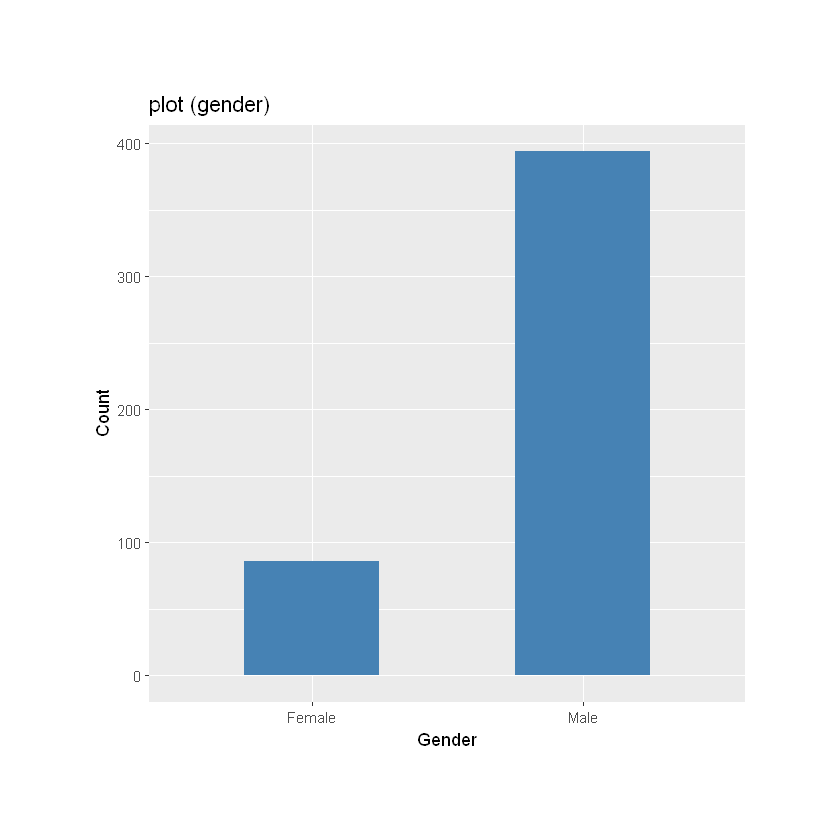

In [30]:
countgender <- table(dftrain$Gender)
#countgender
gendernames <- dimnames(countgender)
#gendernames
fcountg <- as.data.frame(countgender)
fcountg
genderplot <- ggplot(fcountg, aes(Var1, Freq)) + geom_bar(stat = "identity",width = 0.5, fill ="steelblue") + theme(plot.margin = margin(2,2,2,2,"cm")) +labs(title = "plot (gender)", x = "Gender", y = "Count")
genderplot

## Bar plot for Married

Var1,Freq
No,169
Yes,311


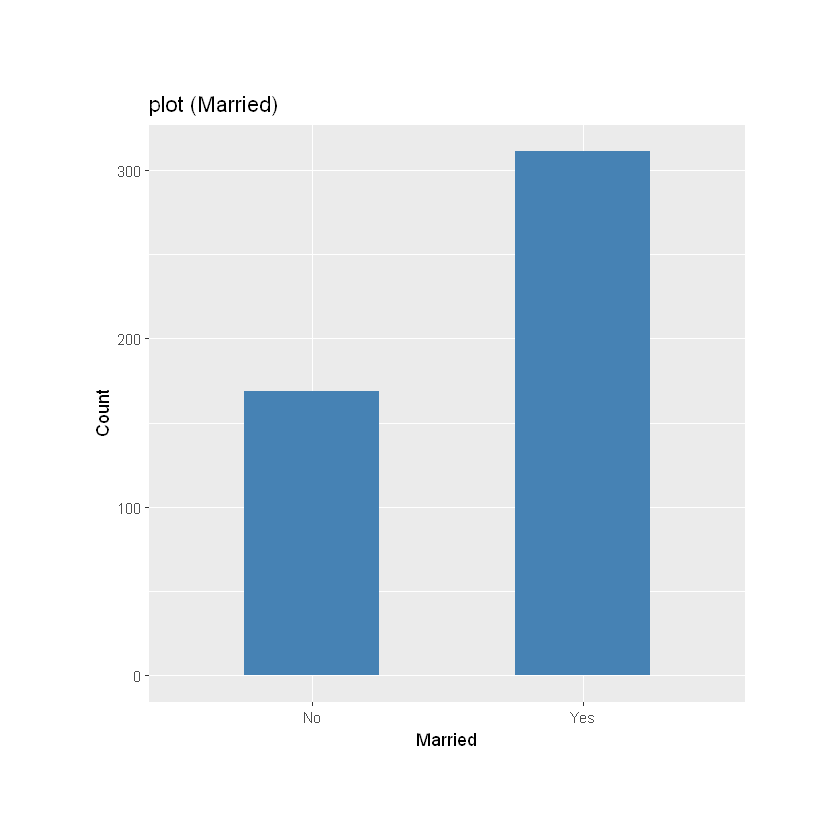

In [31]:
countmarried <- table(dftrain$Married)
as.data.frame(countmarried)

marriedplot <- ggplot(as.data.frame(countmarried), aes(Var1, Freq)) + geom_bar(stat = "identity",width = 0.5, fill ="steelblue") + theme(plot.margin = margin(2,2,2,2,"cm")) +labs(title = "plot (Married)", x = "Married", y = "Count")
marriedplot

## Bar plot for Education

Var1,Freq
Graduate,383
Not Graduate,97


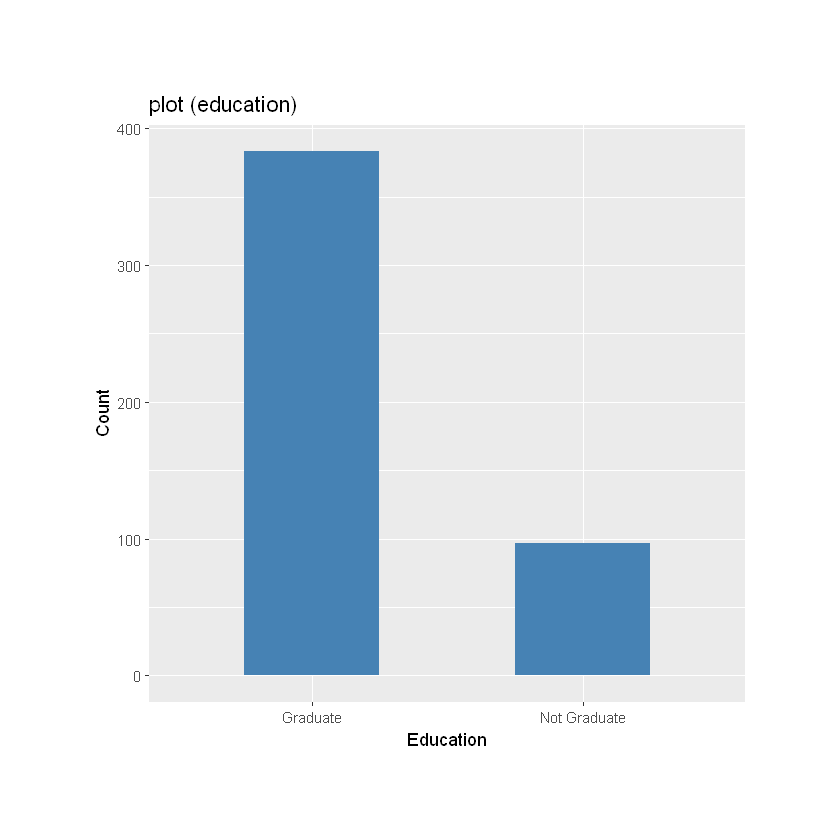

In [32]:
counteducation <- table(dftrain$Education)
as.data.frame(counteducation)

educationplot <- ggplot(as.data.frame(counteducation), aes(Var1, Freq)) + geom_bar(stat = "identity",width = 0.5, fill ="steelblue") + theme(plot.margin = margin(2,2,2,2,"cm")) +labs(title = "plot (education)", x = "Education", y = "Count")
educationplot

## Bar plot for Self Employement

Var1,Freq
Graduate,383
Not Graduate,97


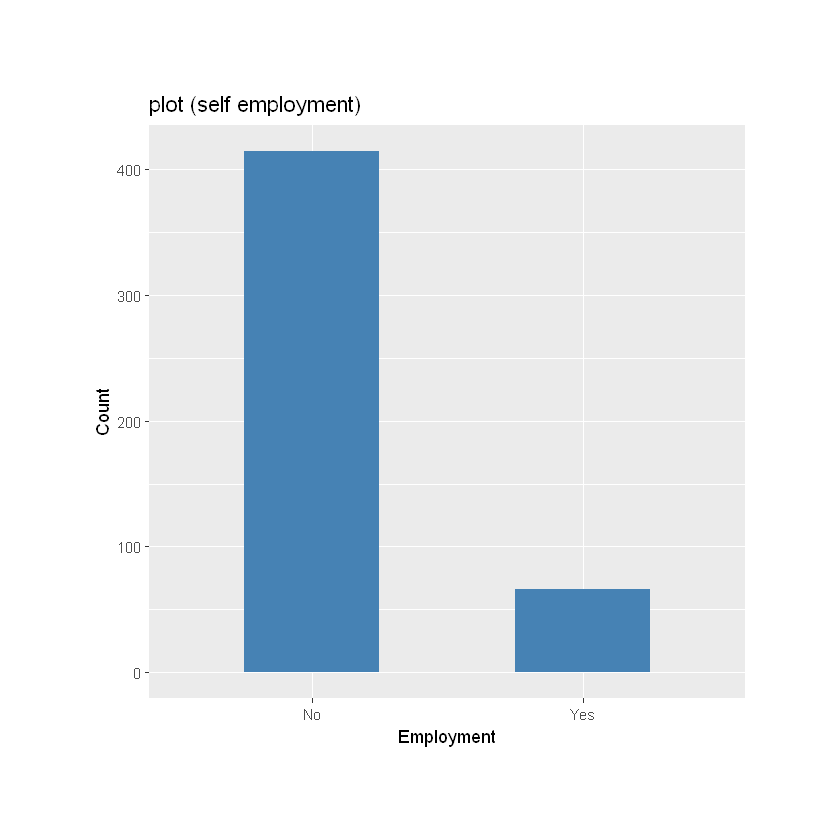

In [33]:
countemployed <- table(dftrain$Self_Employed)
as.data.frame(counteducation)

employmentplot <- ggplot(as.data.frame(countemployed), aes(Var1, Freq)) + geom_bar(stat = "identity",width = 0.5, fill ="steelblue") + theme(plot.margin = margin(2,2,2,2,"cm")) +labs(title = "plot (self employment)", x = "Employment", y = "Count")
employmentplot

## Bar plot for Property Area

Var1,Freq
Rural,139
Semiurban,191
Urban,150


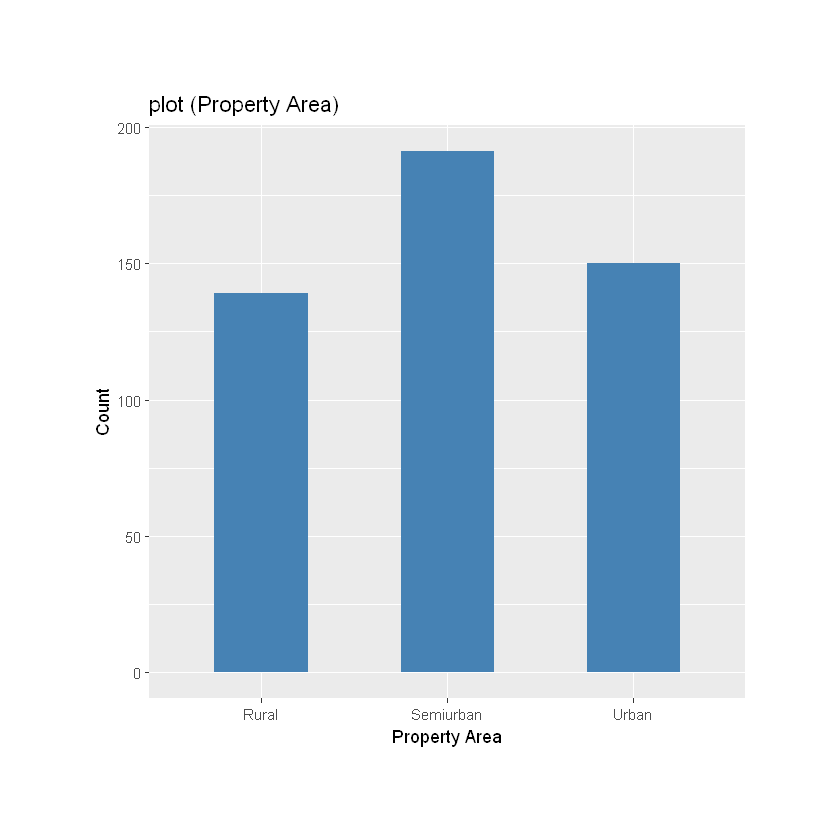

In [34]:
countPropertyArea <- table(dftrain$Property_Area)
as.data.frame(countPropertyArea)

PropertyAreaplot <- ggplot(as.data.frame(countPropertyArea), aes(Var1, Freq)) + geom_bar(stat = "identity",width = 0.5, fill ="steelblue") + theme(plot.margin = margin(2,2,2,2,"cm")) +labs(title = "plot (Property Area)", x = "Property Area", y = "Count")
PropertyAreaplot

## Histogram for loan amount

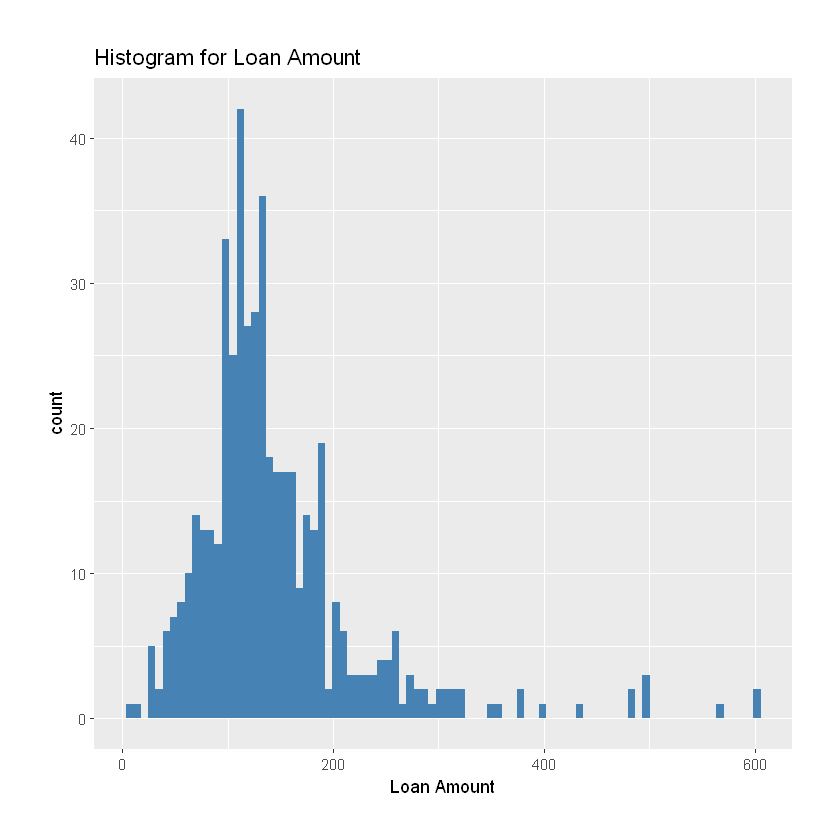

In [35]:
LoanAmountplot <- ggplot(data=dftrain, aes(dftrain$LoanAmount)) + geom_histogram(fill ="steelblue", binwidth = 7) + theme(plot.margin = margin(2,2,2,2,"cm")) + theme(plot.margin = margin(1,1,1,1,'cm')) + labs(title = "Histogram for Loan Amount", x = "Loan Amount")
LoanAmountplot

## Data Preparation for PCA and Correlation Matrix

In [ ]:
# structure before conversion
str(dftrain)

In [ ]:
dfnum <- dftrain
dfnum$Gender <- as.integer(dfnum$Gender) 
dfnum$Married <- as.integer(dfnum$Married)
dfnum$Education <- as.integer(dfnum$Education)
dfnum$Loan_Status <- as.integer(dfnum$Loan_Status)
dfnum$Property_Area <- as.integer(dfnum$Property_Area)
dfnum$Self_Employed <- as.integer(dfnum$Self_Employed)
dfnum$Dependents <- as.integer(dfnum$Dependents)

# structure after conversion 
str(dfnum)

## Principal Component Analysis (PCA) 

In [24]:
pcaResult <- prcomp(dfnum[,c(2:13)])
pcaResult$rotation[,c(1,2,3)]

,PC1,PC2,PC3
Gender,-1.879542e-06,-2.391847e-05,2.835710e-05
Married,-2.818853e-06,-2.004374e-05,-5.408531e-04
Dependents,-2.348916e-05,-7.272243e-06,-7.508113e-04
Education,9.091475e-06,1.451416e-05,8.138479e-04
Self_Employed,-1.033185e-05,-3.048763e-06,-6.460989e-05
ApplicantIncome,-9.978190e-01,-6.558862e-02,6.071421e-03
CoapplicantIncome,6.564553e-02,-9.978134e-01,6.252928e-03
LoanAmount,-6.914984e-03,-8.154964e-03,-8.266505e-01
Loan_Amount_Term,1.219407e-04,1.845990e-04,-5.626454e-01
Credit_History,3.464203e-06,2.284859e-06,-4.282963e-05


## Correlation Matrix

In [36]:
str(dfnum[,c(2:13)])
cormatelements <- dfnum[,c(2:13)]
str(cormatelements)

'data.frame':	480 obs. of  12 variables:
 $ Gender           : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Married          : int  2 2 2 1 2 2 2 2 2 2 ...
 $ Dependents       : int  2 1 1 1 3 1 4 3 2 3 ...
 $ Education        : int  1 1 2 1 1 2 1 1 1 1 ...
 $ Self_Employed    : int  1 2 1 1 2 1 1 1 1 1 ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 5417 2333 3036 4006 12841 3200 ...
 $ CoapplicantIncome: int  1508 0 2358 0 4196 1516 2504 1526 10968 700 ...
 $ LoanAmount       : int  128 66 120 141 267 95 158 168 349 70 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 0 1 1 1 ...
 $ Property_Area    : int  1 3 3 3 3 3 2 3 2 3 ...
 $ Loan_Status      : int  1 2 2 2 2 2 1 2 1 2 ...
'data.frame':	480 obs. of  12 variables:
 $ Gender           : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Married          : int  2 2 2 1 2 2 2 2 2 2 ...
 $ Dependents       : int  2 1 1 1 3 1 4 3 2 3 ...
 $ Education        : int  1 1 2 1 1 2 1 1 1 1 ...
 $ Self_Em

In [37]:
cormat <- cor(cormatelements, use = 'everything', method = "pearson")
cormatround <- round(cormat,2)
cormatround

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.35,0.22,0.06,0.00,0.03,0.16,0.10,-0.09,0.02,0.00,0.06
Married,0.35,1.00,0.39,0.00,0.02,0.04,0.10,0.18,-0.11,0.03,0.04,0.11
Dependents,0.22,0.39,1.00,0.03,0.05,0.13,0.00,0.17,-0.10,-0.03,0.00,0.04
Education,0.06,0.00,0.03,1.00,-0.01,-0.13,-0.07,-0.17,-0.10,-0.06,-0.06,-0.07
Self_Employed,0.00,0.02,0.05,-0.01,1.00,0.17,0.00,0.12,-0.03,-0.02,-0.05,-0.03
ApplicantIncome,0.03,0.04,0.13,-0.13,0.17,1.00,-0.11,0.50,-0.01,-0.06,-0.05,-0.04
CoapplicantIncome,0.16,0.10,0.00,-0.07,0.00,-0.11,1.00,0.19,-0.01,-0.01,0.01,-0.05
LoanAmount,0.10,0.18,0.17,-0.17,0.12,0.50,0.19,1.00,0.05,-0.04,-0.11,-0.07
Loan_Amount_Term,-0.09,-0.11,-0.10,-0.10,-0.03,-0.01,-0.01,0.05,1.00,0.03,-0.06,-0.01
Credit_History,0.02,0.03,-0.03,-0.06,-0.02,-0.06,-0.01,-0.04,0.03,1.00,0.00,0.53


In [27]:
# reordering the correlation matrix elementa
cormatround <- reorder_correlation_matrix(cormatround)


cormatround_upper <- get_upper_tri(cormatround)
cormatround_upper

,Self_Employed,ApplicantIncome,LoanAmount,Education,Gender,Married,Dependents,CoapplicantIncome,Property_Area,Loan_Amount_Term,Credit_History,Loan_Status
Self_Employed,1,0.17,0.12,-0.01,0.00,0.02,0.05,0.00,-0.05,-0.03,-0.02,-0.03
ApplicantIncome,NA,1.00,0.50,-0.13,0.03,0.04,0.13,-0.11,-0.05,-0.01,-0.06,-0.04
LoanAmount,NA,NA,1.00,-0.17,0.10,0.18,0.17,0.19,-0.11,0.05,-0.04,-0.07
Education,NA,NA,NA,1.00,0.06,0.00,0.03,-0.07,-0.06,-0.10,-0.06,-0.07
Gender,NA,NA,NA,NA,1.00,0.35,0.22,0.16,0.00,-0.09,0.02,0.06
Married,NA,NA,NA,NA,NA,1.00,0.39,0.10,0.04,-0.11,0.03,0.11
Dependents,NA,NA,NA,NA,NA,NA,1.00,0.00,0.00,-0.10,-0.03,0.04
CoapplicantIncome,NA,NA,NA,NA,NA,NA,NA,1.00,0.01,-0.01,-0.01,-0.05
Property_Area,NA,NA,NA,NA,NA,NA,NA,NA,1.00,-0.06,0.00,0.03
Loan_Amount_Term,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.03,-0.01


In [ ]:
# functions that are going to be used for Correlation matix plotting (in further steps)

# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}

# function for reordering correlation matrix
reorder_correlation_matrix <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}

In [28]:
# melting the cormat round upper
library(reshape2)
melted_cormatround_upper <- melt(cormatround_upper, na.rm = T) 
melted_cormatround

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1,0.35,0.22,0.06,0.00,0.03,0.16,0.10,-0.09,0.02,0.00,0.06
Married,NA,1.00,0.39,0.00,0.02,0.04,0.10,0.18,-0.11,0.03,0.04,0.11
Dependents,NA,NA,1.00,0.03,0.05,0.13,0.00,0.17,-0.10,-0.03,0.00,0.04
Education,NA,NA,NA,1.00,-0.01,-0.13,-0.07,-0.17,-0.10,-0.06,-0.06,-0.07
Self_Employed,NA,NA,NA,NA,1.00,0.17,0.00,0.12,-0.03,-0.02,-0.05,-0.03
ApplicantIncome,NA,NA,NA,NA,NA,1.00,-0.11,0.50,-0.01,-0.06,-0.05,-0.04
CoapplicantIncome,NA,NA,NA,NA,NA,NA,1.00,0.19,-0.01,-0.01,0.01,-0.05
LoanAmount,NA,NA,NA,NA,NA,NA,NA,1.00,0.05,-0.04,-0.11,-0.07
Loan_Amount_Term,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.03,-0.06,-0.01
Credit_History,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.00,0.00,0.53


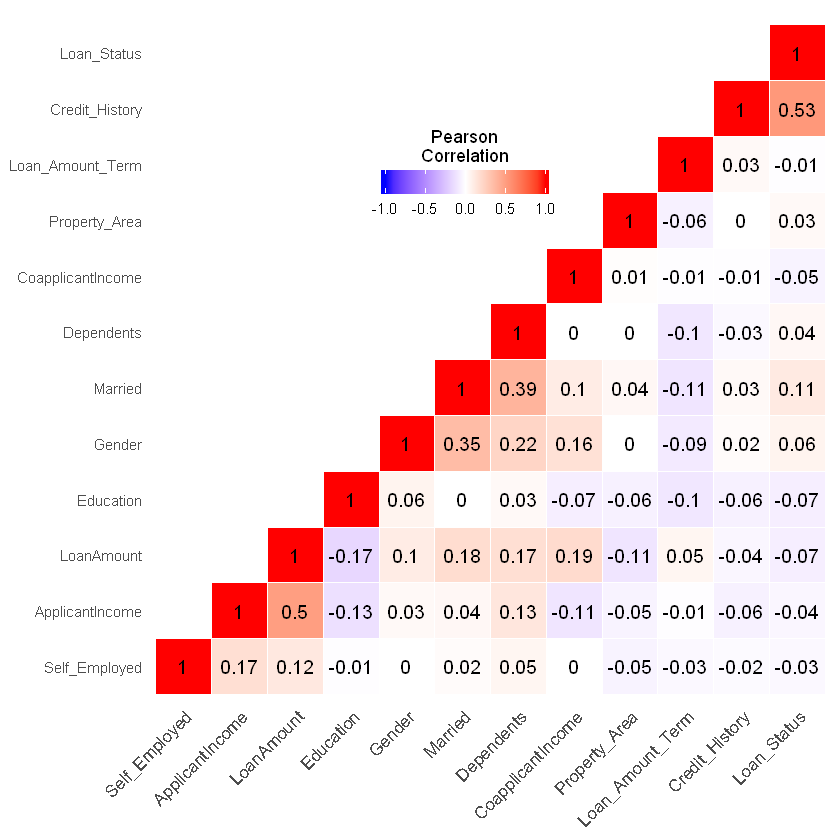

In [29]:
# plotting the correlation Matrix with values
correlation_plot <- ggplot(data = melted_cormatround_upper, aes(Var2, Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") + theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 10, hjust = 1)) +
  coord_fixed()


correlation_plot  + 
  geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.ticks = element_blank(),
    legend.justification = c(1, 0),
    legend.position = c(0.6, 0.7),
    legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                               title.position = "top", title.hjust = 0.5))
